In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from plot_util import plot_history

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './data/dogs-vs-cats-small/train'
VAL_DIR = './data/dogs-vs-cats-small/validation'

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3 ,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
train_gen = ImageDataGenerator(rescale=1./255)
train_iter = train_gen.flow_from_directory(TRAIN_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

val_gen = ImageDataGenerator(rescale=1./255)
val_iter = val_gen.flow_from_directory(VAL_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(train_iter, steps_per_epoch=100, epochs=30,
                              validation_data=val_iter, validation_steps=50, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 13s - loss: 0.6890 - acc: 0.5325 - val_loss: 0.6801 - val_acc: 0.5030
Epoch 2/30
 - 10s - loss: 0.6477 - acc: 0.6230 - val_loss: 0.6311 - val_acc: 0.6440
Epoch 3/30
 - 10s - loss: 0.5909 - acc: 0.6790 - val_loss: 0.6176 - val_acc: 0.6450
Epoch 4/30
 - 10s - loss: 0.5550 - acc: 0.7170 - val_loss: 0.6359 - val_acc: 0.6310
Epoch 5/30
 - 10s - loss: 0.5377 - acc: 0.7280 - val_loss: 0.6095 - val_acc: 0.6680
Epoch 6/30
 - 10s - loss: 0.5122 - acc: 0.7475 - val_loss: 0.5776 - val_acc: 0.6940
Epoch 7/30
 - 10s - loss: 0.4875 - acc: 0.7585 - val_loss: 0.5795 - val_acc: 0.6860
Epoch 8/30
 - 10s - loss: 0.4683 - acc: 0.7765 - val_loss: 0.5786 - val_acc: 0.7000
Epoch 9/30
 - 10s - loss: 0.4484 - acc: 0.7845 - val_loss: 0.5847 - val_acc: 0.6950
Epoch 10/30
 - 10s - loss: 0.4103 - acc: 0.8205 - val_loss: 0.6573 - val_acc: 0.6920
Epoch 11/30
 - 10s - loss: 0.3881 - acc: 0.8300 - val_loss: 0.5658 - val_acc: 0.7190
Epoch 12/30
 - 10s - loss:

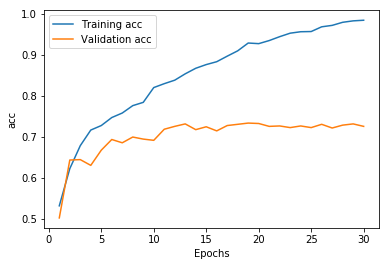

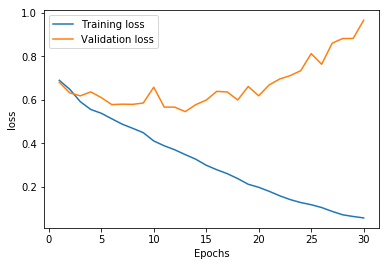

In [7]:
plot_history(history, metrics=('acc', 'loss'))